<a href="https://colab.research.google.com/github/ProboKrishnacahya/Machine_Learning/blob/main/Probo_Krishnacahya_0706012010039_AFL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0706012010039 - Probo Krishnacahya
**IMT01306601-A Machine Learning**

Assessment For Learning 3: Modeling Report "Laptop Sales"

In [1]:
# Import Library untuk Scientific Computing, Data Analysis, Data Visualization, dll.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Library untuk Pre-procesing Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import Model Regresi Data
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Import Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## Data understanding

In [2]:
# Load dataset .csv yang telah diunggah ke GitHub
url = 'https://raw.githubusercontent.com/ProboKrishnacahya/Dataset/main/Laptops.csv'
header = (['brand', 'cpu', 'ram', 'operating_system', 'storage', 'screen_size', 'benefit', 'price'])
df = pd.read_csv(url, delimiter=';', names=header)

In [3]:
# Tampilkan 5 baris awal dari data
df.head()

,brand,cpu,ram,operating_system,storage,screen_size,benefit,price
0,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,Intel Core i3 Processor (10th Gen),8 GB,64 bit Windows 11 Operating System,512 GB SSD,15 inch,Office Home and Student 2021,"32,990"
1,Lenovo Celeron Dual Core - (4 GB/256 GB HDD/25...,Intel Celeron Dual Core Processor,4 GB,DOS Operating System,256 GB HDD|256 GB SSD,15 inch,1 Years Warranty,"19,990"
2,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,Intel Core i3 Processor (11th Gen),8 GB,Windows 11 Operating System,1 TB HDD|256 GB SSD,15 inch,1 YEAR,"39,990"
3,HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...,Intel Core i3 Processor (11th Gen),8 GB,64 bit Windows 11 Operating System,512 GB SSD,14 inch,Microsoft Office Home & Student 2021,"40,990"
4,ASUS ROG Strix G15 Ryzen 7 Octa Core AMD R7-48...,AMD Ryzen 7 Octa Core Processor,16 GB,Windows 11 Operating System,1 TB SSD,15 inch,Microsoft Office Home & Student,"85,990"


In [4]:
# Tampilkan 5 baris akhir dari data
df.tail()

,brand,cpu,ram,operating_system,storage,screen_size,benefit,price
2069,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Intel Core i3 Processor (11th Gen),8 GB,64 bit Windows 11 Operating System,512 GB SSD,15 inch,Office Home and Student 2021,"37,490"
2070,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,AMD Ryzen 5 Hexa Core Processor,8 GB,64 bit Windows 11 Operating System,512 GB SSD,17 Inch,1 Year Onsite Warranty,"60,964"
2071,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core 4800...,AMD Ryzen 7 Octa Core Processor,8 GB,64 bit Windows 10 Operating System,512 GB SSD,15 inch,Microsoft Office Home and Student 2019,"78,500"
2072,Lenovo IdeaPad Gaming 3 Ryzen 5 Hexa Core 5600...,AMD Ryzen 5 Hexa Core Processor,8 GB,64 bit Windows 10 Operating System,512 GB SSD,15 inch,1 Year Warranty Term,"73,990"
2073,HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...,Intel Core i3 Processor (11th Gen),8 GB,64 bit Windows 11 Operating System,512 GB SSD,14 inch,Microsoft Office Home & Student 2021,"40,990"


In [5]:
# Menampilkan banyaknya baris dan kolom dari data
baris, kolom = df.shape
print('Row:', baris)
print('Column:', kolom)

Row: 2074
Column: 8


In [6]:
# Menampilkan index, dtype, columns, non-null values, dan memory usage dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             2074 non-null   object
 1   cpu               2074 non-null   object
 2   ram               2074 non-null   object
 3   operating_system  2074 non-null   object
 4   storage           2074 non-null   object
 5   screen_size       2074 non-null   object
 6   benefit           2074 non-null   object
 7   price             2074 non-null   object
dtypes: object(8)
memory usage: 129.8+ KB


In [7]:
# Kolom ram seharusnya memiliki dtype berupa int
df['ram'].unique()

array(['8 GB', '4 GB', '16 GB'], dtype=object)

In [8]:
# Mengubah kolom ram dari object menjadi int
df['ram'] = df['ram'].str.replace('[^0-9]', '', regex=True).astype(int)
df['ram'].unique()

array([ 8,  4, 16])

In [9]:
# Kolom screen_size seharusnya memiliki dtype berupa int
df['screen_size'].unique()

array(['15 inch', '14 inch', '15 Inch', '14 Inch', '17 Inch'],
      dtype=object)

In [10]:
# Mengubah kolom screen_size dari object menjadi int
df['screen_size'] = df['screen_size'].str.replace('[^0-9]', '', regex=True).astype(int)
df['screen_size'].unique()

array([15, 14, 17])

In [11]:
# Kolom price seharusnya memiliki dtype berupa int
df['price'].unique()

array(['32,990', '19,990', '39,990', '40,990', '85,990', '37,490',
       '59,990', '137,990', '53,990', '52,990', '49,990', '73,990',
       '76,490', '71,990', '51,890', '28,990', '58,950', '42,990',
       '60,964', '62,650', '75,990', '78,500', '32,890', '67,990',
       '20,990', '29,990', '37,990', '23,990', '44,990', '73,690',
       '30,990', '56,999', '82,990'], dtype=object)

In [12]:
# Mengubah kolom price dari object menjadi int
df['price'] = df['price'].str.replace('[^0-9]', '', regex=True).astype(int)
df['price'].unique()

array([ 32990,  19990,  39990,  40990,  85990,  37490,  59990, 137990,
        53990,  52990,  49990,  73990,  76490,  71990,  51890,  28990,
        58950,  42990,  60964,  62650,  75990,  78500,  32890,  67990,
        20990,  29990,  37990,  23990,  44990,  73690,  30990,  56999,
        82990])

In [13]:
# Deskripsi dari masing-masing column pada data
df.describe()

,ram,screen_size,price
count,2074.000000,2074.000000,2074.000000
mean,9.598843,14.928640,55447.999518
std,3.399883,0.512948,20633.316355
min,4.000000,14.000000,19990.000000
25%,8.000000,15.000000,39990.000000
50%,8.000000,15.000000,52990.000000
75%,8.000000,15.000000,67990.000000
max,16.000000,17.000000,137990.000000


In [14]:
# Pengecekan missing value
df.isna().sum()

brand               0
cpu                 0
ram                 0
operating_system    0
storage             0
screen_size         0
benefit             0
price               0
dtype: int64

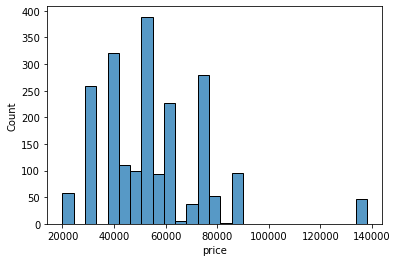

In [15]:
# Histplot
sns.histplot(df['price'])
plt.show()

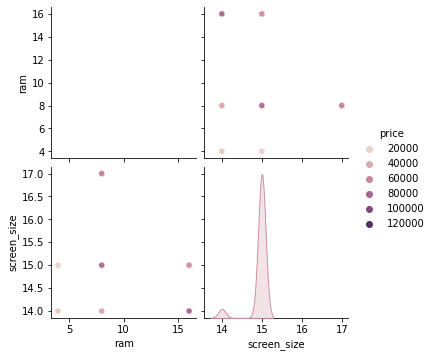

In [16]:
# Pairplot
sns.pairplot(data=df, hue="price")
plt.show()

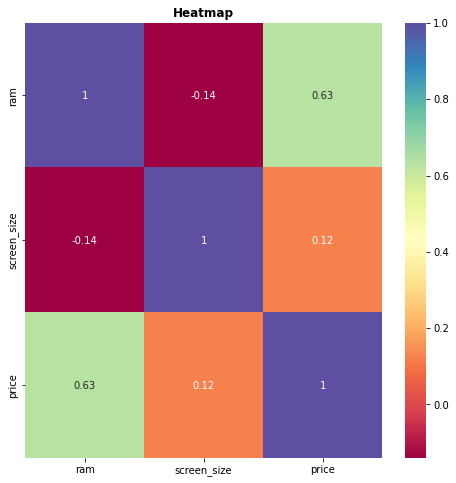

In [17]:
# Heatmap
corr = df.corr()
corr['price'].sort_values(ascending=False)

plt.figure(figsize=(8,8))
plt.title('Heatmap', fontweight='bold')
sns.heatmap(corr, annot=True, cmap='Spectral')
plt.show()

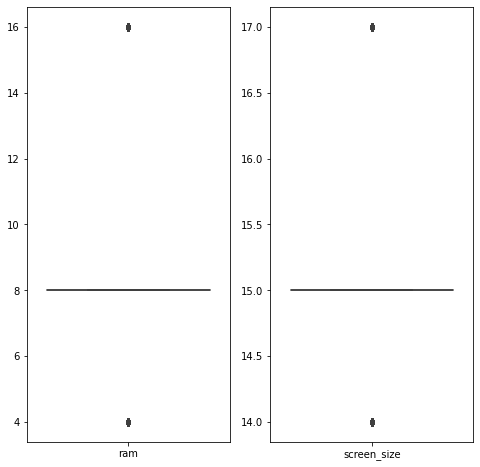

In [18]:
# Boxplot
fig, ax = plt.subplots(1, 2, figsize=(8,8))
sns.boxplot(data=df.loc[:, ['ram']], ax=ax[0])
sns.boxplot(data=df.loc[:, ['screen_size']], ax=ax[1])
plt.show()

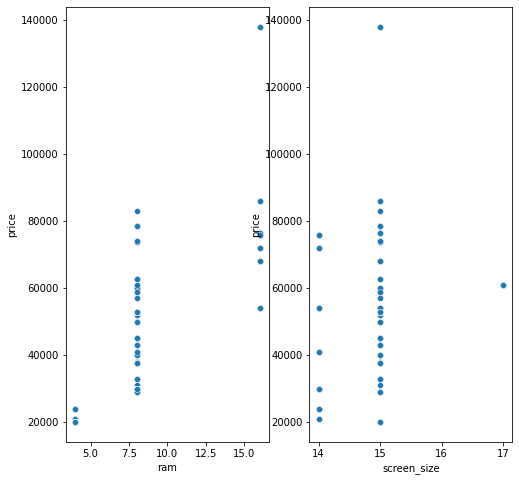

<Figure size 576x576 with 0 Axes>

In [19]:
# Scatterplot
fig, ax = plt.subplots(1, 2, figsize=(8,8))
plt.figure(figsize=(8,8))
sns.scatterplot(x='ram', y='price', data=df, ax=ax[0])
sns.scatterplot(x='screen_size', y='price', data=df, ax=ax[1])
plt.show()

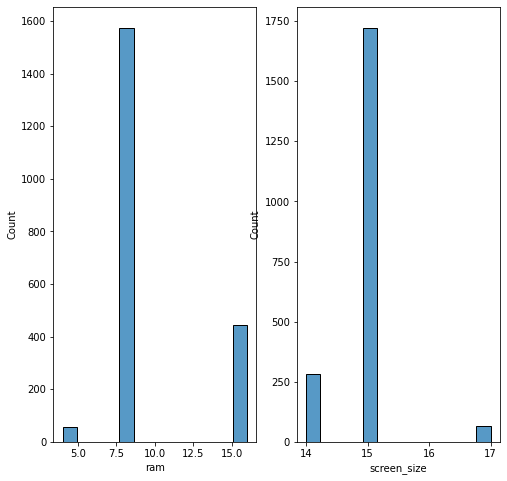

In [20]:
# Histogram
fig, ax = plt.subplots(1, 2, figsize=(8,8))
sns.histplot(df['ram'], ax=ax[0])
sns.histplot(df['screen_size'], ax=ax[1])
plt.show()

## Data preparation

In [21]:
# Memisahkan dataset menjadi x dan y menggunakan loc
encode = LabelEncoder()
df.loc[:, ['brand', 'cpu', 'ram', 'operating_system', 'storage', 'screen_size', 'benefit']]=df.loc[:, ['brand', 'cpu', 'ram', 'operating_system', 'storage', 'screen_size', 'benefit']].apply(encode.fit_transform)
df

,brand,cpu,ram,operating_system,storage,screen_size,benefit,price
0,5,5,1,1,6,1,17,32990
1,16,3,0,2,4,1,7,19990
2,9,6,1,3,0,1,0,39990
3,10,6,1,1,6,0,15,40990
4,0,2,2,3,1,1,13,85990
...,...,...,...,...,...,...,...,...
2069,20,6,1,1,6,1,17,37490
2070,2,1,1,1,6,2,2,60964
2071,23,2,1,0,6,1,16,78500
2072,22,1,1,0,6,1,6,73990


In [22]:
# Pengecekan kembali setelah dilakukan encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   brand             2074 non-null   int64
 1   cpu               2074 non-null   int64
 2   ram               2074 non-null   int64
 3   operating_system  2074 non-null   int64
 4   storage           2074 non-null   int64
 5   screen_size       2074 non-null   int64
 6   benefit           2074 non-null   int64
 7   price             2074 non-null   int64
dtypes: int64(8)
memory usage: 129.8 KB


In [23]:
# Memisahkan dataset menjadi x dan y menggunakan loc
X = df.loc[:, df.columns != 'price']
y = df.loc[:, 'price']

In [24]:
# Faktor-faktor variabel yang mempengaruhi target variabel
X

,brand,cpu,ram,operating_system,storage,screen_size,benefit
0,5,5,1,1,6,1,17
1,16,3,0,2,4,1,7
2,9,6,1,3,0,1,0
3,10,6,1,1,6,0,15
4,0,2,2,3,1,1,13
...,...,...,...,...,...,...,...
2069,20,6,1,1,6,1,17
2070,2,1,1,1,6,2,2
2071,23,2,1,0,6,1,16
2072,22,1,1,0,6,1,6


In [25]:
# Target variabel yang dituju
y

0       32990
1       19990
2       39990
3       40990
4       85990
        ...  
2069    37490
2070    60964
2071    78500
2072    73990
2073    40990
Name: price, Length: 2074, dtype: int64

In [26]:
# Normalisasi data numerik
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Pemisahan menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 32)
X_train

array([[0.47058824, 0.33333333, 0.        , ..., 0.66666667, 0.5       ,
        0.41176471],
       [0.52941176, 0.33333333, 0.5       , ..., 0.83333333, 0.5       ,
        0.47058824],
       [0.14705882, 0.55555556, 0.5       , ..., 1.        , 0.5       ,
        1.        ],
       ...,
       [0.85294118, 0.22222222, 1.        , ..., 0.5       , 0.5       ,
        0.94117647],
       [0.35294118, 0.11111111, 0.5       , ..., 1.        , 0.5       ,
        0.58823529],
       [0.20588235, 1.        , 1.        , ..., 1.        , 0.        ,
        0.11764706]])

## Modeling

### Linear Regression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### K-Nearest Neighbours

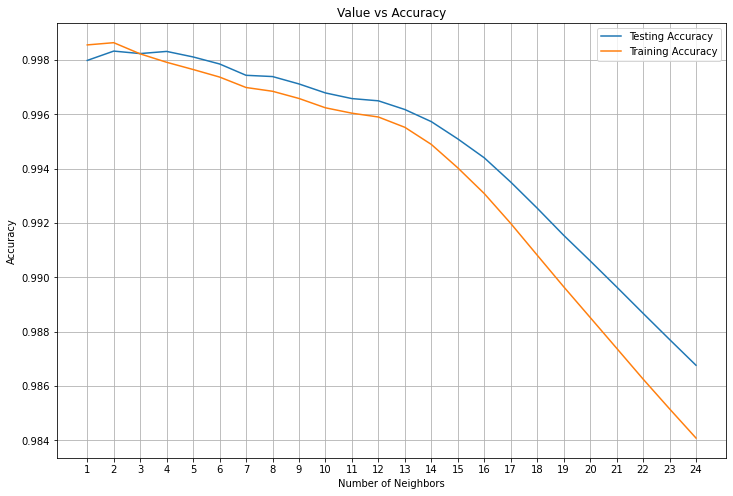

Best Accuracy is 0.9983327271543603 with K = 2


In [29]:
# Kompleksitas model
neighbor = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Ulangi nilai K yang berbeda
for i, k in enumerate(neighbor):
    # Siapkan KNN Regressor dengan K-Neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Fitting pada model
    knn.fit(X_train, y_train)
    
    # Menghitung akurasi pada training set
    train_accuracy.append(knn.score(X_train, y_train))
    
    # Menghitung akurasi pada testing set
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[12,8])
plt.plot(neighbor, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbor, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbor)
plt.grid()
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [30]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

### Gaussian Naïve Bayes

In [31]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Support Vector Machine

In [32]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

SVR()

### Decision Tree

In [33]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

### Random Forest

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=32)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=32)

## Evaluation

In [35]:
regressors = []
regressors.extend([lr, knn, gnb, svm, dt, rf])

In [36]:
models = []
rsquared = []
mae = []
rmse = []

for regressor in regressors:
    models.append(regressor.__class__.__name__)
    rsquared.append(r2_score(y_test, regressor.predict(X_test)))
    mae.append(mean_absolute_error(y_test, regressor.predict(X_test)))
    rmse.append(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))

evaluation = pd.DataFrame({'Model': models, 'R^2': rsquared, 'MAE': mae, 'RMSE': rmse})
evaluation

,Model,R^2,MAE,RMSE
0,LinearRegression,0.553996,10432.981456,13057.525797
1,KNeighborsRegressor,0.998333,141.573034,798.353040
2,GaussianNB,0.996360,164.847512,1179.567894
3,SVR,0.000816,14403.659625,19544.044363
4,DecisionTreeRegressor,0.998949,139.336506,633.921272
5,RandomForestRegressor,0.998948,140.784423,634.034898
